In [4]:
import numpy as np
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import string
import os
from PIL import Image
import glob
from pickle import dump, load
from time import time
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import LSTM, Embedding, TimeDistributed, Dense, RepeatVector,\
                         Activation, Flatten, Reshape, concatenate, Dropout, BatchNormalization
from keras.optimizers import Adam, RMSprop
from keras.layers.wrappers import Bidirectional
from keras.layers.merge import add
from keras.applications.inception_v3 import InceptionV3
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.preprocessing import image
from keras.models import Model
from keras import Input, layers
from keras import optimizers
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [5]:
model = MobileNetV2(weights='imagenet')

14540800/14536120 [==============================] - 138s 9us/step


In [6]:
model_transform =  Model(model.input, model.layers[-2].output)

In [7]:
model_transform.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

In [15]:
def preprocess(image_path):
    # Convert all the images to size 299x299 as expected by the inception v3 model
    img = image.load_img(image_path, target_size=(224, 224))
    # Convert PIL image to numpy array of 3-dimensions
    x = image.img_to_array(img)
    # Add one more dimension
    x = np.expand_dims(x, axis=0)
    # preprocess the images using preprocess_input() from inception module
    x = preprocess_input(x)
    return x

In [16]:
def encode(image):
    image = preprocess(image) # preprocess the image
    fea_vec = model_transform.predict(image) # Get the encoding vector for the image
    fea_vec = np.reshape(fea_vec, fea_vec.shape[1]) # reshape from (1, 2048) to (2048, )
    return fea_vec

In [11]:
def prepare_training_data(lda_result_file , directory_name ):
    f = open(lda_result_file,"rb")
    dict_lda = load(f)
    train_x = []
    train_y = []
    #print(dict_lda)
    for index,key in enumerate(dict_lda.keys()):
        #print("key",key,"index",index)
        if(index%100 == 0 ):
            print(index)
        image_path = directory_name + "/" + get_path(key)+".jpg"
        image_vector = encode(image_path)
        train_x.append( list(image_vector))
        train_y.append(list(dict_lda[key]))
    train_x = np.array(train_x)
    train_y = np.array(train_y)
    
    return train_x,train_y

In [17]:
def get_path(key):
    len1 = len(str(key))
    str2 = "0"*(12-len1) + str(key)
    return str2

In [18]:
train_x , train_y = prepare_training_data("ProjectFile_val2017/Pro_top=30_pass=10_top=30words:8:45pm/ldaResult","val2017")

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900


In [21]:
def dump_into_file(filename,dataobject):
    with open(filename,"wb") as f:
        dump(dataobject,f)
        

In [23]:
dump_into_file("train_x_mobilenet",train_x)
dump_into_file("train_y_mobilenet",train_y)

In [231]:
train_x = load(open("train_x","rb"))
#train_y = load(open("train_y","rb"))

In [24]:
train_y.shape

(5000, 30)

In [ ]:
print("YESSSSSSSSSSS")

In [27]:
model = Sequential()
model.add(Dense(256, input_dim=1280))
model.add(Activation('relu'))

# model.add(Dense(256, input_dim=512))
# model.add(Activation('relu'))

model.add(Dense(128, input_dim=256))
model.add(Activation('relu'))

model.add(Dense(30, input_dim=128))
model.add(Activation('softmax'))

model.summary()

adam_opt = optimizers.adam(lr=0.001)
model.compile(optimizer=adam_opt , loss="categorical_crossentropy",metrics=['accuracy'])

model.fit(train_x,train_y,epochs=500,verbose=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               327936    
_________________________________________________________________
activation_7 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_8 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 30)                3870      
_________________________________________________________________
activation_9 (Activation)    (None, 30)                0         
Total params: 364,702
Trainable params: 364,702
Non-trainable params: 0
_________________________________________________________________
Epoc

5000/5000 [==============================] - 1s 157us/step - loss: 0.8498 - acc: 0.8254
Epoch 72/500
5000/5000 [==============================] - 1s 180us/step - loss: 0.8454 - acc: 0.8266
Epoch 73/500
5000/5000 [==============================] - 2s 413us/step - loss: 0.8435 - acc: 0.8282
Epoch 74/500
5000/5000 [==============================] - 1s 252us/step - loss: 0.8393 - acc: 0.8280
Epoch 75/500
5000/5000 [==============================] - 1s 156us/step - loss: 0.8397 - acc: 0.8324
Epoch 76/500
5000/5000 [==============================] - 1s 163us/step - loss: 0.8399 - acc: 0.8166
Epoch 77/500
5000/5000 [==============================] - 2s 372us/step - loss: 0.8414 - acc: 0.8298
Epoch 78/500
5000/5000 [==============================] - 1s 251us/step - loss: 0.8374 - acc: 0.8304
Epoch 79/500
5000/5000 [==============================] - 1s 150us/step - loss: 0.8405 - acc: 0.8274
Epoch 80/500
5000/5000 [==============================] - 1s 150us/step - loss: 0.8346 - acc: 0.8336
Epo

5000/5000 [==============================] - 1s 150us/step - loss: 0.7831 - acc: 0.8798
Epoch 152/500
5000/5000 [==============================] - 1s 148us/step - loss: 0.7817 - acc: 0.8714
Epoch 153/500
5000/5000 [==============================] - 1s 149us/step - loss: 0.7867 - acc: 0.8788
Epoch 154/500
5000/5000 [==============================] - 1s 149us/step - loss: 0.7877 - acc: 0.8678
Epoch 155/500
5000/5000 [==============================] - 1s 149us/step - loss: 0.7861 - acc: 0.8734
Epoch 156/500
5000/5000 [==============================] - 1s 149us/step - loss: 0.7841 - acc: 0.8762
Epoch 157/500
5000/5000 [==============================] - 1s 149us/step - loss: 0.7843 - acc: 0.8810
Epoch 158/500
5000/5000 [==============================] - 1s 150us/step - loss: 0.7866 - acc: 0.8688
Epoch 159/500
5000/5000 [==============================] - 1s 150us/step - loss: 0.7846 - acc: 0.8738
Epoch 160/500
5000/5000 [==============================] - 1s 149us/step - loss: 0.7879 - acc: 0

5000/5000 [==============================] - 1s 204us/step - loss: 0.7786 - acc: 0.8846
Epoch 232/500
5000/5000 [==============================] - 1s 206us/step - loss: 0.7799 - acc: 0.8854
Epoch 233/500
5000/5000 [==============================] - 1s 216us/step - loss: 0.8008 - acc: 0.8612
Epoch 234/500
5000/5000 [==============================] - 1s 199us/step - loss: 0.7953 - acc: 0.8668
Epoch 235/500
5000/5000 [==============================] - 1s 225us/step - loss: 0.7825 - acc: 0.8784
Epoch 236/500
5000/5000 [==============================] - 1s 225us/step - loss: 0.7707 - acc: 0.8980
Epoch 237/500
5000/5000 [==============================] - 1s 223us/step - loss: 0.7618 - acc: 0.9178
Epoch 238/500
5000/5000 [==============================] - 1s 207us/step - loss: 0.7561 - acc: 0.9258
Epoch 239/500
5000/5000 [==============================] - 1s 208us/step - loss: 0.7535 - acc: 0.9216
Epoch 240/500
5000/5000 [==============================] - 1s 205us/step - loss: 0.7561 - acc: 0

5000/5000 [==============================] - 1s 222us/step - loss: 0.8442 - acc: 0.8224
Epoch 312/500
5000/5000 [==============================] - 1s 198us/step - loss: 0.8197 - acc: 0.8576
Epoch 313/500
5000/5000 [==============================] - 1s 189us/step - loss: 0.7831 - acc: 0.8854
Epoch 314/500
5000/5000 [==============================] - 1s 213us/step - loss: 0.7671 - acc: 0.9042
Epoch 315/500
5000/5000 [==============================] - 1s 214us/step - loss: 0.7604 - acc: 0.9126
Epoch 316/500
5000/5000 [==============================] - 1s 220us/step - loss: 0.7543 - acc: 0.9260
Epoch 317/500
5000/5000 [==============================] - 1s 246us/step - loss: 0.7508 - acc: 0.9374
Epoch 318/500
5000/5000 [==============================] - 1s 243us/step - loss: 0.7499 - acc: 0.9400
Epoch 319/500
5000/5000 [==============================] - 1s 241us/step - loss: 0.7518 - acc: 0.9298
Epoch 320/500
5000/5000 [==============================] - 1s 231us/step - loss: 0.7509 - acc: 0

5000/5000 [==============================] - 1s 203us/step - loss: 0.8196 - acc: 0.8450
Epoch 392/500
5000/5000 [==============================] - 1s 195us/step - loss: 0.7813 - acc: 0.8844
Epoch 393/500
5000/5000 [==============================] - 1s 172us/step - loss: 0.7698 - acc: 0.8942
Epoch 394/500
5000/5000 [==============================] - 1s 205us/step - loss: 0.7576 - acc: 0.9154
Epoch 395/500
5000/5000 [==============================] - 1s 213us/step - loss: 0.7516 - acc: 0.9276
Epoch 396/500
5000/5000 [==============================] - 1s 203us/step - loss: 0.7503 - acc: 0.9372
Epoch 397/500
5000/5000 [==============================] - 1s 228us/step - loss: 0.7478 - acc: 0.9410
Epoch 398/500
5000/5000 [==============================] - 1s 160us/step - loss: 0.7492 - acc: 0.9406
Epoch 399/500
5000/5000 [==============================] - 1s 160us/step - loss: 0.7474 - acc: 0.9480
Epoch 400/500
5000/5000 [==============================] - 1s 164us/step - loss: 0.7476 - acc: 0

5000/5000 [==============================] - 1s 153us/step - loss: 0.7497 - acc: 0.9374
Epoch 472/500
5000/5000 [==============================] - 1s 163us/step - loss: 0.7553 - acc: 0.9212
Epoch 473/500
5000/5000 [==============================] - 1s 150us/step - loss: 0.7593 - acc: 0.9082
Epoch 474/500
5000/5000 [==============================] - 1s 153us/step - loss: 0.7632 - acc: 0.9052
Epoch 475/500
5000/5000 [==============================] - 1s 151us/step - loss: 0.7635 - acc: 0.9028
Epoch 476/500
5000/5000 [==============================] - 1s 150us/step - loss: 0.7779 - acc: 0.8854
Epoch 477/500
5000/5000 [==============================] - 1s 152us/step - loss: 0.7850 - acc: 0.8740
Epoch 478/500
5000/5000 [==============================] - 1s 153us/step - loss: 0.7977 - acc: 0.8708
Epoch 479/500
5000/5000 [==============================] - 1s 162us/step - loss: 0.7958 - acc: 0.8684
Epoch 480/500
5000/5000 [==============================] - 1s 172us/step - loss: 0.7759 - acc: 0

In [184]:
# with open("train_x","wb") as f:
#     dump(train_x,f)

# with open("train_y","wb") as f:
#     dump(train_y,f)

In [234]:
with open("models/model_30_topics_30_words_acc_91_2:03am_val_2017_70_passes","wb") as f:
    dump(model,f)

In [28]:
def predict_test_image(image_path):
    image_vector = encode(image_path)
    image_vector_1 = np.array([image_vector])
    print(image_vector_1.shape)
    probas = model.predict(image_vector_1)
    return probas

In [29]:
def predict_words_probablity(image_path , dictionary_file_name , topic_word_file,  num_of_topics ):
    f = open(topic_word_file , 'rb')
    topic_word_prob = load(f)
    all_unique_words_in_topics = []
    final_probablity = {}
    
    probality_topic_image = list(predict_test_image(image_path))
    
    for topic_num in topic_word_prob.keys():
        for word in topic_word_prob[topic_num].keys():
            if word not in all_unique_words_in_topics:
                all_unique_words_in_topics.append(word)
                
    for word in all_unique_words_in_topics:
        
        for topic in topic_word_prob.keys():
            
            #print(topic,word)
            if word not in final_probablity:
                final_probablity[word] = 0
            
            if word in topic_word_prob[topic]:
                final_probablity[word] += topic_word_prob[topic][word]*probality_topic_image[0][topic]
    
    sorted_probs_word_text = [(k, final_probablity[k]) for k in sorted(final_probablity, key=final_probablity.get, reverse=True)]
    return sorted_probs_word_text

In [210]:
#probabs = predict_words_probablity("83085.jpg",'Dict','ProjectFile_val2017/Pro_top=30_pass=70_top=30words:8:50pm/topic_word_prob',10)

In [32]:
def test_images(dirname,num_of_topics):
    for filenames in os.listdir(dirname):
        
        plt.imshow(np.array(Image.open(dirname+"/"+filenames)))
        plt.show()
        probabs = predict_words_probablity(dirname+"/"+filenames,'Dict','ProjectFile_val2017/Pro_top=30_pass=10_top=30words:8:45pm/topic_word_prob',num_of_topics)
        for i in probabs[:100]:
            print(i)

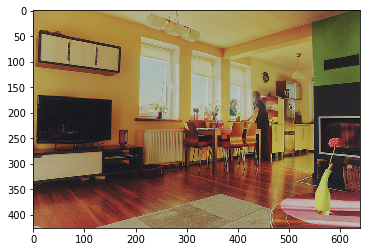

(1, 1280)
('room', 0.10819572718946802)
('live', 0.055642008781433105)
('chair', 0.04739661142230052)
('couch', 0.03676110878586769)
('stand', 0.036594936211026434)
('table', 0.023952650614169745)
('woman', 0.017223874658375857)
('large', 0.01551976776527616)
('elephant', 0.015381362289190292)
('walk', 0.014387990563652057)
('wear', 0.011813761666646595)
('elephants', 0.011689936742186546)
('furniture', 0.011144476011395454)
('television', 0.009719646616929367)
('black', 0.00905209380980122)
('bedroom', 0.008977724239230156)
('windows', 0.008826280012726943)
('white', 0.007902596554277691)
('area', 0.0072724444036746634)
('kitchen', 0.0067363949492573755)
('brown', 0.006483952381724534)
('look', 0.006204285530110036)
('house', 0.00597832165658474)
('baby', 0.005693756044021242)
('remote', 0.005664619617164511)
('fireplace', 0.00558371702209115)
('view', 0.005467081879828794)
('suit', 0.0051857223734259605)
('floor', 0.00482880332054948)
('hold', 0.00481639600021983)
('sofa', 0.00469615

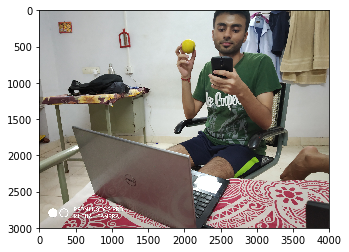

(1, 1280)
('hold', 0.07156952225768341)
('woman', 0.04603849041294317)
('skateboard', 0.04019298404455185)
('person', 0.029669242301658183)
('umbrella', 0.029484257102012634)
('young', 0.02543328602836796)
('plate', 0.018908086129611743)
('hand', 0.01624932287850811)
('trick', 0.015737902373075485)
('child', 0.015425010664100444)
('skate', 0.01455704029649496)
('board', 0.010889404910411571)
('wear', 0.010587520642715731)
('food', 0.009443256267818612)
('skateboarder', 0.00932501070201397)
('stand', 0.008914923760593347)
('white', 0.00875783437471424)
('jump', 0.008678231940102421)
('ramp', 0.00854200217872858)
('cake', 0.008020212787339373)
('kitchen', 0.0072833959420677274)
('black', 0.007275266263741566)
('table', 0.007128877297679415)
('small', 0.006829208420584627)
('look', 0.006695110346952134)
('laptop', 0.0061464746851838115)
('shirt', 0.005864345151223915)
('little', 0.005859735213029377)
('sandwich', 0.005681215785443783)
('walk', 0.005276238506580846)
('bench', 0.00518355769

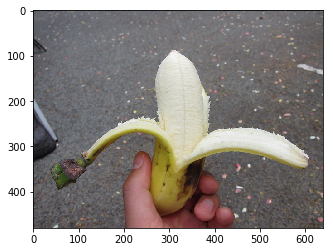

(1, 1280)
('hold', 0.043699252289738366)
('tree', 0.030228974994849216)
('bananas', 0.029242733551654965)
('woman', 0.027738126612624425)
('orange', 0.02654973110193737)
('skateboard', 0.023647550493478775)
('banana', 0.02301274338492476)
('bunch', 0.018441298114794336)
('plant', 0.017878280952572823)
('umbrella', 0.017347069457173347)
('statue', 0.017294595018029213)
('person', 0.01663225897956211)
('young', 0.014958728927966902)
('leave', 0.013271718804177546)
('tennis', 0.01302831619977951)
('talk', 0.011275557050062446)
('hang', 0.010846104216636121)
('green', 0.010335379552117725)
('hand', 0.009585093004709222)
('smoke', 0.009584823623299599)
('trick', 0.009259398095309734)
('stand', 0.009170485774083637)
('child', 0.009079166587525833)
('skate', 0.00856463797390461)
('small', 0.007346247500921739)
('wear', 0.006650343580986373)
('board', 0.006405826190997721)
('street', 0.006289665220056501)
('cigarette', 0.006085827946662903)
('large', 0.006058443957260111)
('group', 0.006032391

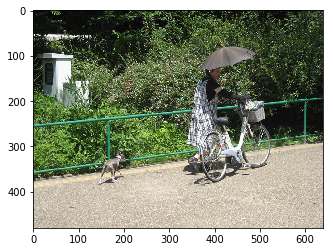

(1, 1280)
('park', 0.08274850811031857)
('motorcycle', 0.05277293920516968)
('horse', 0.033574409782886505)
('play', 0.03163554711472102)
('game', 0.029152570514971582)
('video', 0.01745101995766163)
('people', 0.016076468380060084)
('stand', 0.01438198152897997)
('road', 0.014327417202370185)
('double', 0.01001643855124712)
('near', 0.00996675381376376)
('outside', 0.009887353954400775)
('street', 0.009295127855667218)
('build', 0.00927198950633984)
('green', 0.008498700998639287)
('tree', 0.008201460583685606)
('decker', 0.0077514247968792915)
('bananas', 0.007645242986882295)
('orange', 0.007410188475881256)
('controller', 0.007065116427838802)
('cars', 0.006977354153377746)
('person', 0.006813365381038754)
('group', 0.00657507681822563)
('motor', 0.006115301512181759)
('banana', 0.006094766775180727)
('nintendo', 0.006021101959049702)
('line', 0.005928231403231621)
('remote', 0.0050345018575299605)
('bunch', 0.004862002144329247)
('plant', 0.004735135473310947)
('white', 0.00463772

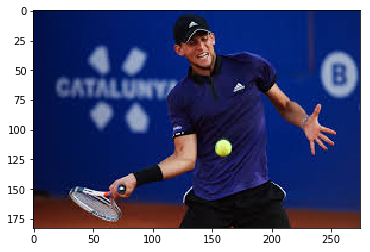

(1, 1280)
('tennis', 0.12870942056179047)
('hold', 0.05082480930639753)
('ball', 0.045351436332566664)
('court', 0.04153051599860191)
('woman', 0.03700908444303731)
('player', 0.035042913630604744)
('racket', 0.03018920309841633)
('play', 0.027583255308211162)
('skateboard', 0.0183157566934824)
('young', 0.017527126430945773)
('baseball', 0.01741904951632023)
('swing', 0.016537314979359508)
('person', 0.016138710911307485)
('racquet', 0.014888354577124119)
('umbrella', 0.013435839675366879)
('hand', 0.012414253451552216)
('stand', 0.01168040437290734)
('game', 0.010085452088890001)
('serve', 0.009913180998410098)
('shirt', 0.009291548514784155)
('wear', 0.008271506056189537)
('trick', 0.0071716890670359135)
('white', 0.007056574299439726)
('child', 0.007029164897325302)
('match', 0.006994905415922403)
('ready', 0.006934173754416406)
('skate', 0.006633576471358538)
('black', 0.006573537580023488)
('male', 0.006115422118455172)
('prepare', 0.0054623158648610115)
('players', 0.00528818974

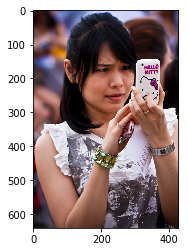

(1, 1280)
('phone', 0.0629868358373642)
('hold', 0.06240155480192243)
('desk', 0.0443138837513839)
('cell', 0.034062597900629044)
('woman', 0.032949564541595165)
('skateboard', 0.030096959322690964)
('umbrella', 0.022078143432736397)
('person', 0.02045527151681829)
('monitor', 0.019159864634275436)
('young', 0.01819366926839662)
('picture', 0.012447619226998925)
('trick', 0.011784718371927738)
('child', 0.011550638915977629)
('hand', 0.011488951339206141)
('keyboard', 0.011362371967275742)
('skate', 0.010900476016104221)
('table', 0.009759291185742683)
('office', 0.009612152352929115)
('board', 0.008153632884503097)
('computers', 0.0081473708279729)
('wear', 0.007924834704802208)
('cellphone', 0.00738984439522028)
('skateboarder', 0.006982672959566116)
('take', 0.006806563254485809)
('items', 0.006699916906654835)
('ramp', 0.0063963476568460464)
('desktop', 0.006330718751996756)
('look', 0.005944774149412511)
('chair', 0.005544075899656775)
('stand', 0.005051750169596331)
('blue', 0.00

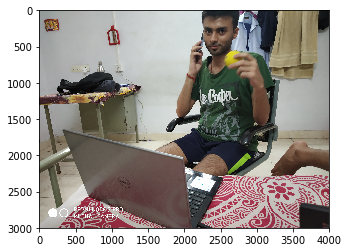

(1, 1280)
('hold', 0.07978184534078821)
('woman', 0.04926740109560166)
('skateboard', 0.044985659420490265)
('umbrella', 0.03300000727176666)
('plate', 0.032273218037118453)
('person', 0.03093438080122288)
('young', 0.027269401477349978)
('trick', 0.017614513635635376)
('child', 0.01726431406645495)
('hand', 0.017172439406433523)
('skate', 0.016292845830321312)
('food', 0.01538197611876249)
('cake', 0.013689351308953948)
('board', 0.012569680621104432)
('wear', 0.011845123955594998)
('table', 0.011476789497046114)
('skateboarder', 0.010436940006911755)
('sandwich', 0.009697023779153824)
('white', 0.009640821789842442)
('ramp', 0.009560564532876015)
('stand', 0.008060113289674369)
('jump', 0.007392072775761492)
('small', 0.007345409929922776)
('little', 0.006558459479399009)
('shirt', 0.006293394603419075)
('black', 0.006060468436539623)
('piece', 0.0060268244706094265)
('smile', 0.005747599527731432)
('baby', 0.005691593979266196)
('slice', 0.005428392442360019)
('broccoli', 0.00541507

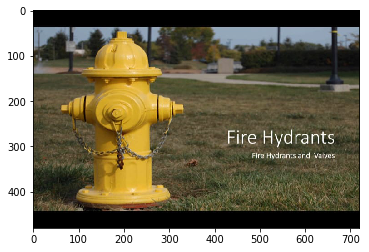

(1, 1280)
('sign', 0.034486238195540864)
('stand', 0.02954871158277484)
('field', 0.028483400302340867)
('hold', 0.021543966605065634)
('grass', 0.021358372594534103)
('woman', 0.01836872636194265)
('truck', 0.016048214204346323)
('toilet', 0.015008017420768738)
('bathroom', 0.014817645471872254)
('street', 0.014266988186871998)
('white', 0.013516646960692833)
('stop', 0.01320572107948692)
('hydrant', 0.012778506913686982)
('sheep', 0.011959195137023926)
('skateboard', 0.01161087118089199)
('fence', 0.01085957232862711)
('green', 0.010781387674676068)
('small', 0.010553378908974977)
('large', 0.009303062992805191)
('young', 0.008850499508737286)
('grassy', 0.008528020232915878)
('umbrella', 0.008517354726791382)
('person', 0.008466391235294886)
('graze', 0.008164884522557259)
('road', 0.008110455893553414)
('bird', 0.007936879992485046)
('baseball', 0.00791188608855009)
('kite', 0.007850149646401405)
('girl', 0.007403346244245768)
('near', 0.00732338716258843)
('tree', 0.00695205031576

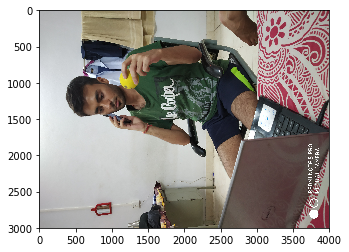

(1, 1280)
('water', 0.05635412067291371)
('boat', 0.034216511994600296)
('wave', 0.030350301414728165)
('surfboard', 0.029674317687749863)
('people', 0.028457593913925293)
('beach', 0.02369113576781956)
('hold', 0.023438575661613847)
('person', 0.0206484458969226)
('ocean', 0.020031677559018135)
('surf', 0.019236823543906212)
('room', 0.018023760465652572)
('board', 0.017730929429821605)
('woman', 0.017245842751260426)
('group', 0.013022488030536579)
('skateboard', 0.01228561345487833)
('young', 0.011993909254575316)
('stand', 0.011320451015350296)
('surfer', 0.010302934795618057)
('large', 0.01012582717375666)
('live', 0.009269122034311295)
('small', 0.009047124943608846)
('umbrella', 0.009012323804199696)
('body', 0.00847734697163105)
('near', 0.008415034106364218)
('chair', 0.007895561936751526)
('river', 0.007313078735023737)
('lake', 0.0065574864856898785)
('couch', 0.006123847793787718)
('dock', 0.0059940698556602)
('white', 0.005905399324043526)
('black', 0.005639806943928049)
(

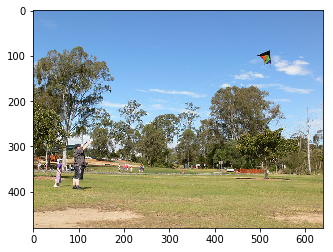

(1, 1280)
('toilet', 0.053345080465078354)
('bathroom', 0.05266836330374153)
('field', 0.03816123475335858)
('stand', 0.0316371920622798)
('grass', 0.029426369338206824)
('kite', 0.027902876958251)
('white', 0.024165690479437674)
('airplane', 0.01927986554801464)
('sink', 0.018922577837408083)
('plane', 0.017424315214157104)
('small', 0.017355111782624437)
('horse', 0.017033841460943222)
('sheep', 0.01647721230983734)
('fence', 0.014962167479097843)
('large', 0.01376824004677554)
('grassy', 0.011749787256121635)
('shower', 0.01135141309350729)
('graze', 0.011249464005231857)
('blue', 0.011193259485058407)
('beach', 0.011004230711271351)
('green', 0.010454311079489529)
('runway', 0.00901364628225565)
('herd', 0.008823416195809841)
('look', 0.00744947588521342)
('open', 0.0070719387787304315)
('group', 0.006964375005994604)
('airport', 0.006820024617439913)
('seat', 0.006670238532102191)
('near', 0.006474038031510536)
('tile', 0.00576724865825929)
('walk', 0.005249640169403558)
('black',

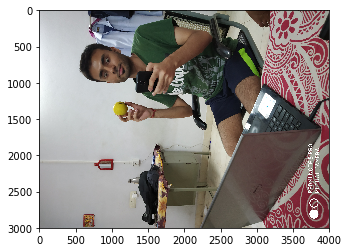

(1, 1280)
('room', 0.07612989722110797)
('hold', 0.05259146902739962)
('live', 0.03908500447869301)
('woman', 0.03471336902050975)
('chair', 0.033293131744839596)
('skateboard', 0.02906189113855362)
('couch', 0.025822361931204796)
('person', 0.022135228834519394)
('umbrella', 0.02131885103881359)
('young', 0.018762950241572873)
('table', 0.017153001370634063)
('hand', 0.011719190750916653)
('trick', 0.011379428207874298)
('child', 0.011154683158110856)
('skate', 0.0105255963280797)
('large', 0.008423681023821093)
('board', 0.007875902101606158)
('wear', 0.007862602945844128)
('tennis', 0.007850230671465397)
('furniture', 0.00782829150557518)
('black', 0.0077560793724362)
('television', 0.006958984478842467)
('skateboarder', 0.006742530968040228)
('jump', 0.006665571203335219)
('bedroom', 0.0063062855042517185)
('windows', 0.00619990518515883)
('ramp', 0.006176369730383158)
('look', 0.006118182077413609)
('white', 0.005733189426443381)
('stand', 0.005352703195332719)
('area', 0.00485195

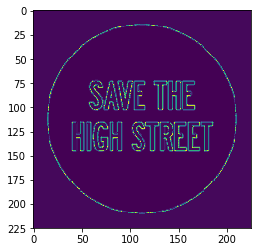

(1, 1280)
('sign', 0.0785801932960159)
('truck', 0.03656967933655153)
('laptop', 0.035727314651012435)
('street', 0.03023795985524588)
('stop', 0.030089236824399495)
('hydrant', 0.02911953083340535)
('road', 0.01846860727168028)
('water', 0.014490750254481145)
('window', 0.013341297042135188)
('white', 0.010719924274141715)
('tree', 0.010708906297493465)
('build', 0.010375379068283501)
('large', 0.010003534943781344)
('near', 0.00917434575193936)
('small', 0.0090064153829057)
('green', 0.008887815329682858)
('boat', 0.008698642253875732)
('park', 0.00857575988084136)
('look', 0.008569011882201737)
('sidewalk', 0.008444790909865085)
('pole', 0.007974772801287645)
('wave', 0.007715760264545679)
('surfboard', 0.007543909829109907)
('blue', 0.006830212053431467)
('desk', 0.006561286747455789)
('city', 0.006074371014218399)
('table', 0.005905789922749623)
('stand', 0.0057494649398964655)
('post', 0.005568752996623516)
('beach', 0.00528135583101809)
('bananas', 0.005133433733135462)
('ocean'

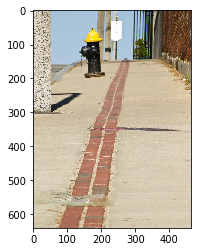

(1, 1280)
('sign', 0.13621637225156866)
('truck', 0.06358164749690332)
('street', 0.05242603472589303)
('stop', 0.05215909887191918)
('hydrant', 0.050479816133702116)
('road', 0.032025155720514606)
('build', 0.016526599603255233)
('park', 0.014898886187061073)
('sidewalk', 0.01463919207463745)
('white', 0.013941039870744538)
('pole', 0.013824029560757883)
('green', 0.012918496828059194)
('large', 0.012646076280027157)
('blue', 0.011822431943421176)
('city', 0.010532968618358961)
('near', 0.010052434359160027)
('post', 0.009653263725340366)
('tree', 0.009217736870034009)
('small', 0.00823867764626129)
('yellow', 0.007848346093843453)
('stand', 0.006873810221714944)
('corner', 0.006582498550436415)
('graffiti', 0.005789685463764904)
('curb', 0.00498518580570817)
('bear', 0.004956804740921172)
('close', 0.00469516231506691)
('outside', 0.004611818925743442)
('attach', 0.004452820401638746)
('frisbee', 0.0044305939227342606)
('background', 0.004236100059015099)
('drive', 0.0040588642066648

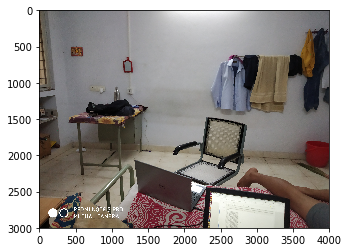

(1, 1280)
('bathroom', 0.06928499229252338)
('toilet', 0.0656634047627449)
('kite', 0.03434614837169647)
('room', 0.029271762468852103)
('white', 0.028547326965322414)
('sink', 0.0285182020661523)
('airplane', 0.023731928318738937)
('plane', 0.02144790068268776)
('small', 0.0189648794129048)
('large', 0.015263759975562487)
('blue', 0.014441914061327934)
('live', 0.014179305173456669)
('shower', 0.01397265587002039)
('beach', 0.012560661312050215)
('chair', 0.012094919135051896)
('wall', 0.011871629829363722)
('bench', 0.011295643636915806)
('runway', 0.011095057241618633)
('mirror', 0.010831468272954226)
('couch', 0.00936786737293005)
('airport', 0.008400632441862399)
('floor', 0.008291153920254146)
('seat', 0.008220711039029993)
('tile', 0.007967782614286989)
('look', 0.007641099742765816)
('view', 0.0072509772153459134)
('table', 0.006960053342578166)
('stand', 0.00620049923465344)
('bath', 0.006123184226453304)
('open', 0.005864268104283948)
('paper', 0.005667534045642242)
('stall',

In [33]:
#model = load(open("models/model_30_topics_7:53pm_val_2017",'rb'))
test_images("test_images",30)

In [215]:
len(probabs)

1447

In [126]:
for index,tup in enumerate(probabs):
    if tup[0] == 'kite':
        print(index)

42


In [ ]:
s = 0
for x in probabs:
    s += x[1]
s